In [ ]:
!pip install transformers
!pip install pandas


In [ ]:
import pandas as pd

tweets_table = pd.read_csv('tweets-data.csv')
tweets_table.head()



,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag
0,0,2023-06-25 19:16:20+00:00,0,NaN,@jacksonhinklle #wagner with 6.2 billion dolla...,wagner
1,1,2023-06-25 19:16:18+00:00,0,NaN,Pobrecito es discapacitado\n#Reddetuiterosdemo...,wagner
2,2,2023-06-25 19:16:07+00:00,0,NaN,News from the EIR Daily Alert\n\n“#Putin Addre...,wagner
3,3,2023-06-25 19:15:56+00:00,0,NaN,It's Messi day #Messi𓃵 #Messi36 #Russia #bigst...,wagner
4,4,2023-06-25 19:15:54+00:00,0,NaN,Il passaggio chiave di Machiavelli era questo ...,wagner


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tweet(tweet_msg):
    tweet_msg = str(tweet_msg).lower()
    tweet_msg = re.sub(r"http\S+|www\S+|https\S+", '', tweet_msg)
    tweet_msg = re.sub(r"@\w+|#\w+", '', tweet_msg)
    tweet_msg = re.sub(r"[^a-z\s]", '', tweet_msg)
    words = tweet_msg.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

tweets_table['clean_tweet_msg'] = tweets_table['Tweets'].apply(clean_tweet)
tweets_table[['Tweets', 'clean_tweet_msg']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,clean_text
0,@jacksonhinklle #wagner with 6.2 billion dolla...,billion dollar
1,Pobrecito es discapacitado\n#Reddetuiterosdemo...,pobrecito es discapacitado
2,News from the EIR Daily Alert\n\n“#Putin Addre...,news eir daily alert addressed people armed ju...
3,It's Messi day #Messi𓃵 #Messi36 #Russia #bigst...,messi day
4,Il passaggio chiave di Machiavelli era questo ...,il passaggio chiave di machiavelli era questo ...


In [ ]:
tweets_table_sample = tweets_table.sample(500, random_state=42).copy()


In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
tweet_msgs = tweets_table_sample['clean_tweet_msg'].tolist()

ml_emotion_tags = []
ml_emotion_powers = []

for i in range(0, len(tweet_msgs), 50):
    batch = tweet_msgs[i:i+50]
    my_results = sentiment_pipeline(batch, truncation=True)
    ml_emotion_tags.extend([r['label'] for r in my_results])
    ml_emotion_powers.extend([r['score'] for r in my_results])

tweets_table_sample['ml_emotion_tag'] = ml_emotion_tags
tweets_table_sample['ml_emotion_power'] = ml_emotion_powers

tweets_table_sample[['Tweets', 'clean_tweet_msg', 'ml_emotion_tag', 'ml_emotion_power']].head(10)

,Tweets,clean_text,ml_sentiment_label,ml_sentiment_score
2899,Le #DessinDePresse de Sanaga : ls sont morts c...,le de sanaga ls sont morts comme ils ont vcu r...,NEGATIVE,0.890084
594,#Russia #Wagner #RussiaCivilWar https://t.co/P...,,POSITIVE,0.748121
2870,Exclusive content -https://t.co/oEiSIIB2Z1\n.\...,exclusive content,POSITIVE,0.998467
52,Auch heute geht die politische Nachricht des T...,auch heute geht die politische nachricht des t...,NEGATIVE,0.975363
1391,@crazyclipsonly Same type that would take a ho...,type would take homemade playstationcontrolled...,NEGATIVE,0.992334
807,#SUGA_AgustD_TOUR_in_Seoul #SUGA_AgustD_TOUR #...,,POSITIVE,0.748121
2761,#Titan mishap: #Implosion with incredible forc...,mishap incredible force amp speed crushing wat...,NEGATIVE,0.989953
196,#Wagner #Russia,,POSITIVE,0.748121
1576,#merri le #titanic 2 le retour https://t.co/4s...,le le retour via,POSITIVE,0.907862
670,"Il Segretario di Stato americano #Blinken: ""no...",il segretario di stato americano non credo che...,NEGATIVE,0.944251


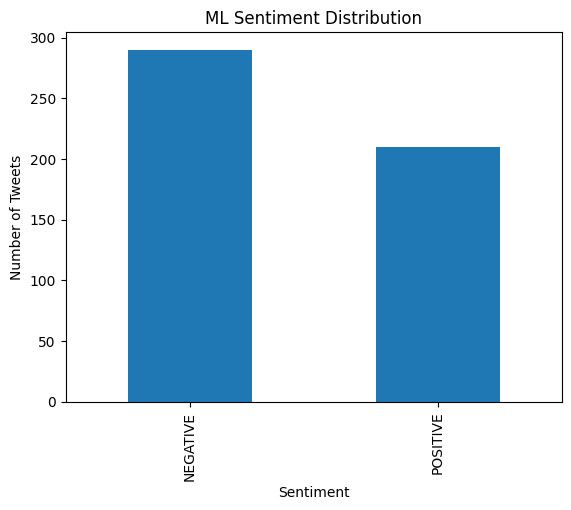

In [ ]:
import matplotlib.pyplot as plt

tweets_table_sample['ml_emotion_tag'].value_counts().plot(kind='bar', title='ML Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
